In [97]:
#import pandas
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm

Samples = 201

In [5]:
filename = "/Users/lmatayoshi/Desktop/EEG/P01.mat"

In [6]:
p01 = sio.loadmat(filename)

In [8]:
matrix_p01 = p01['data']

In [9]:
matrix_p01.shape

(894, 256, 201)

In [11]:
electrodo_8_matrix = matrix[:, 8, :]
electrodo_44_matrix = matrix[:,44, :]
electrodo_80_matrix = matrix[:, 80, :]
electrodo_131_matrix = matrix[:, 131, :]
electrodo_185_matrix = matrix[:, 185, :]

NameError: name 'matrix' is not defined

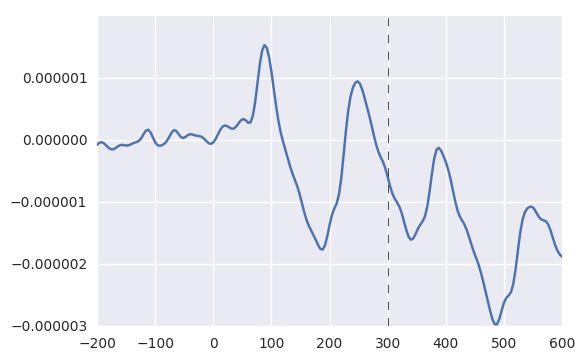

In [85]:
%matplotlib inline
#plt.xkcd()
import numpy as np
plt.plot(np.linspace(-200.0,600.0,Samples),electrodo_8_matrix.mean(axis=0))
plt.axvline(x=300, linestyle='--', color='black', linewidth=0.5)

## Ejercicio 1

In [12]:
electrodo_8_matrix = matrix_p01[:, 8, :]
electrodo_44_matrix = matrix_p01[:,44, :]
electrodo_80_matrix = matrix_p01[:, 80, :]
electrodo_131_matrix = matrix_p01[:, 131, :]
electrodo_185_matrix = matrix_p01[:, 185, :]

In [13]:
def plot_ej1(electrodo_i_matrix, linestyle="-", linewidth=1):
    xs = electrodo_i_matrix.shape[0]
    plt.plot(range(0,xs), electrodo_i_matrix.mean(axis=1), linestyle=linestyle)

## Graficos

894


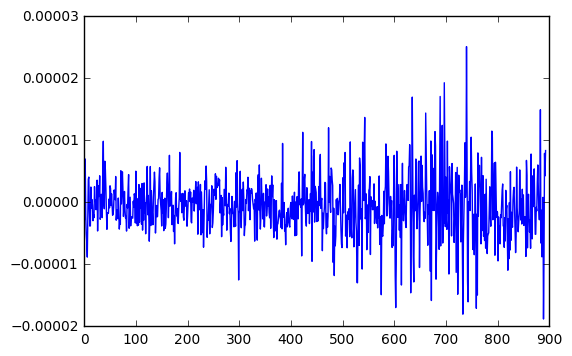

In [12]:
%matplotlib inline
import numpy as np

#electrodo_i_matrix = electrodo_8_matrix
plot_ej1(electrodo_8_matrix)

894


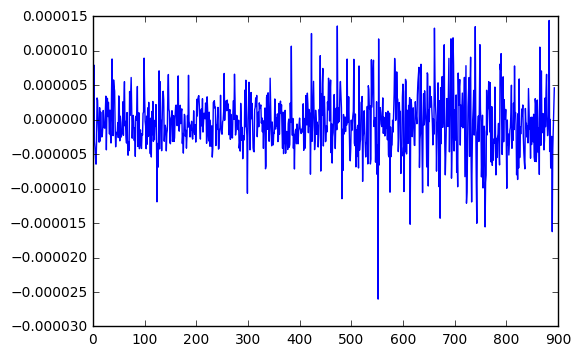

In [13]:
plot_ej1(electrodo_44_matrix)

894


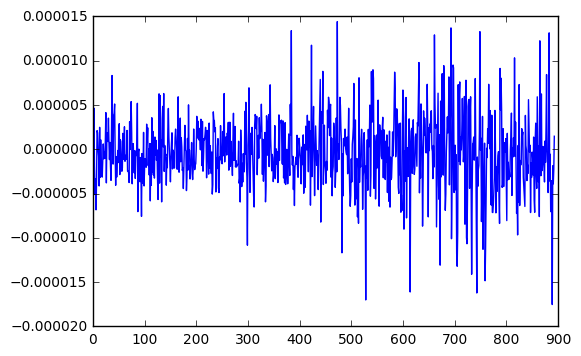

In [14]:
plot_ej1(electrodo_80_matrix)

894


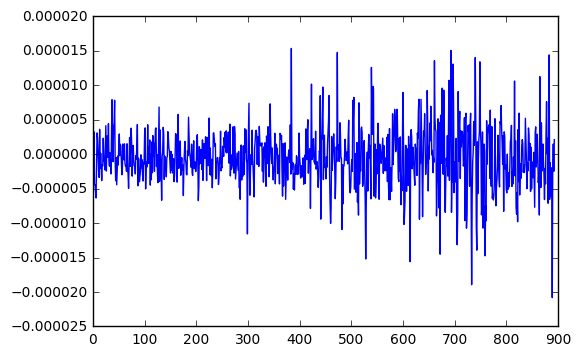

In [15]:
plot_ej1(electrodo_131_matrix)

894


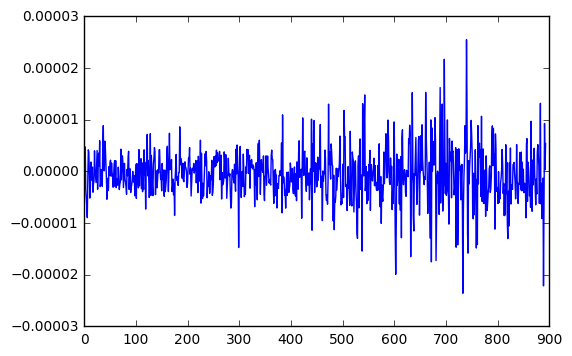

In [17]:
plot_ej1(electrodo_185_matrix)

In [163]:
def grafico_heatmap(frecuencies):
    frecuencies = np.array(frecuencies).T
    ax=seaborn.heatmap(frecuencies,norm=LogNorm(vmin=frecuencies.min(), vmax=frecuencies.max()))
    plt.show()

In [249]:
electrodes = [8, 44, 80, 131, 185]
cant_frec = 30

In [157]:
def all_elec_frecuencias(electrodes):
    all_frecuencies = np.zeros((len(electrodes), 894, 30))
    j = 0
    for electrodo_x in electrodes:
        frecuencies = []
        for i in range (0,894):
            elec_x_frec = matrix_p01[i, electrodo_x, :]
            a, b = welch(elec_x_frec, float(Samples/0.8))
            frecuencies.append(b[0:cant_frec])
        #print frecuencies
        frecuencies = np.array(frecuencies)#.T
        all_frecuencies[j] = frecuencies
        j += 1
    return all_frecuencies

In [158]:
matrix_all_frec = all_elec_frecuencias(electrodes)
mean_all_frec = matrix_all_frec.mean(0)

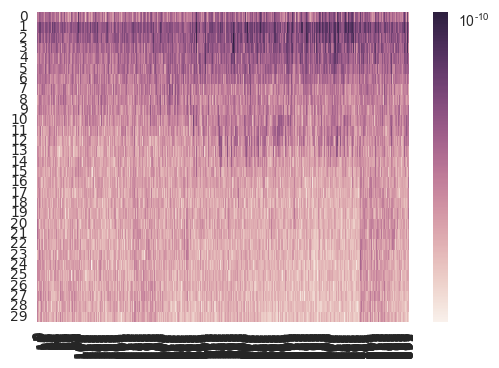

In [162]:
grafico_heatmap(mean_all_frec)

# A2

In [250]:
def ej2_frecuencias(electrode):
    frecuencies = []
    for i in range (0,894):
        elec_x_frec = matrix_p01[i, electrode, :]
        a, b = welch(elec_x_frec, float(Samples/0.8))
        frecuencies.append(b[0:cant_frec])
    #print frecuencies
    frecuencies = np.array(frecuencies)#.T
    return frecuencies

In [251]:
frecs = []
for i in range(0,255):
    ej_2 = ej2_frecuencias(i)
    ej_2 = ej_2.T
    frec = ej_2.mean(1)
    frecs.append(frec)

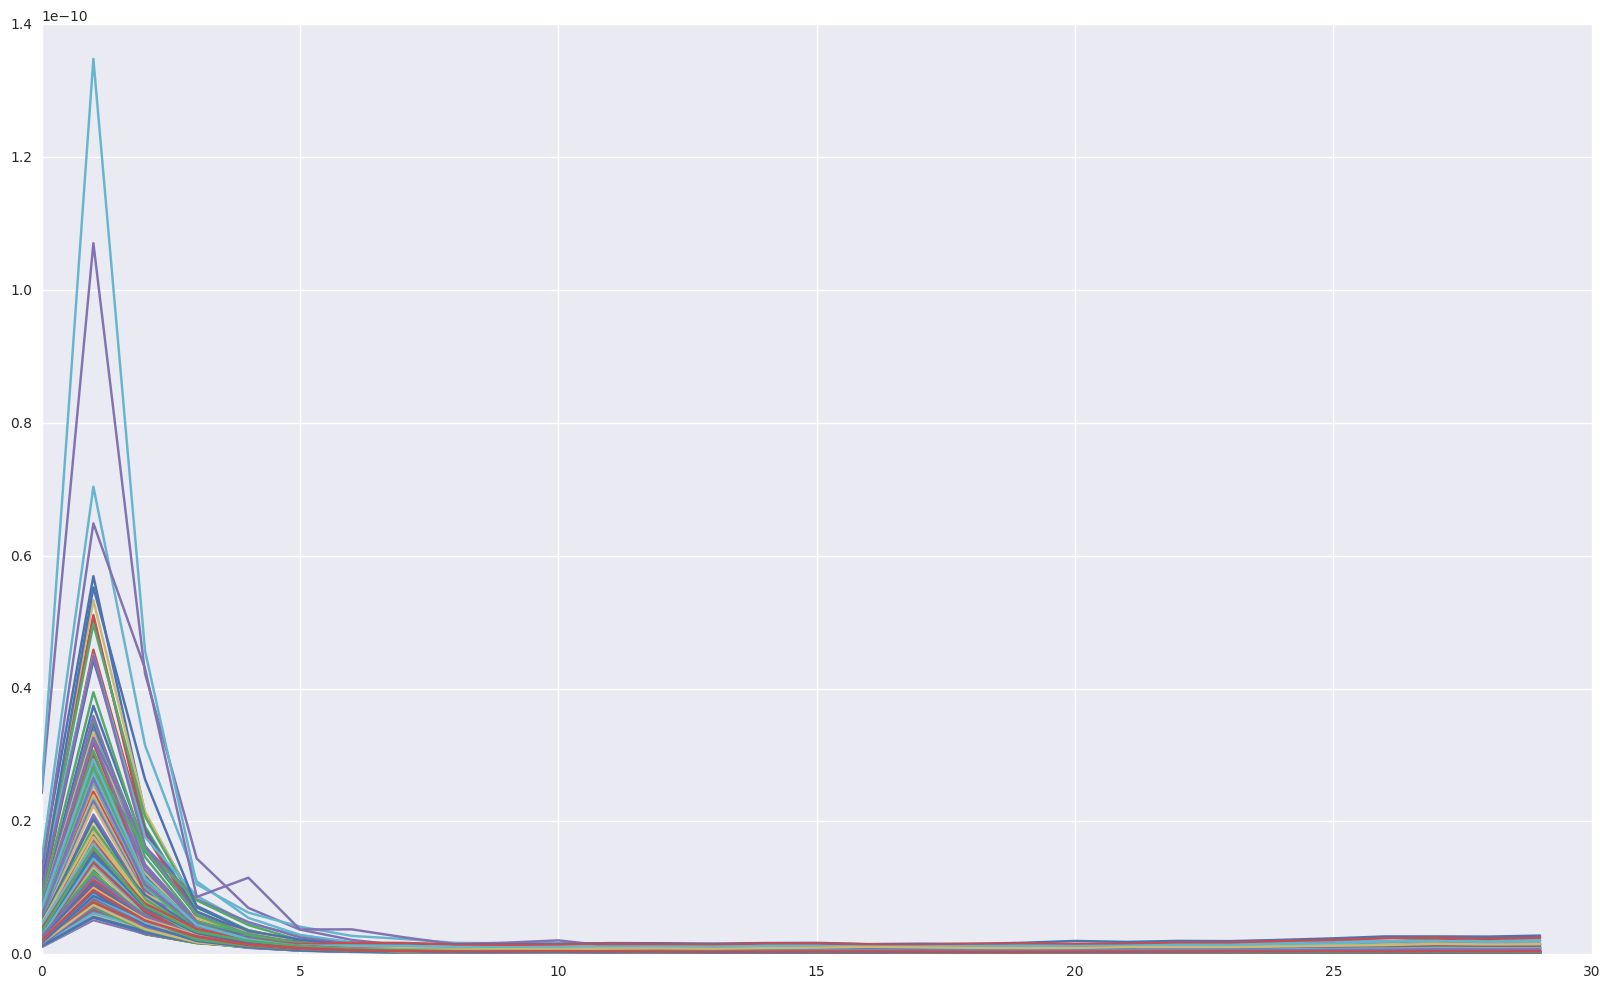

In [252]:
plt.figure(figsize=(20,12))
for i in range(0,255):
    plt.plot(range(0,cant_frec),frecs[i])